In [ ]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa

path_to_imgs = "data/test/images/"
# coco json format: [x,y,width,height]

img_path = "data/test/images/cigarret_jpg.rf.727af4957c8a954d3a692c77da2aae62.jpg"

with open(img_path.replace('.jpg','.txt').replace('images', 'labels'), 'r') as f:
    label = f.read()
    f.close()

image = imageio.imread("data/test/images/cigarret_jpg.rf.727af4957c8a954d3a692c77da2aae62.jpg")
height, width, _ = image.shape

id, x1, y1, w, h = label.split(' ')
x1 = float(x1)
y1 = float(y1)
w = float(w)
h = float(h)
def yolobbox2bbox(x,y,w,h):
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return x1, y1, x2, y2

x1, y1, x2, y2 = yolobbox2bbox(x1,y1,w,h)
x1 = x1*width
x2 = x2*width
y1 = y1*height
y2 = y2*height


bb = BoundingBoxesOnImage([BoundingBox(x1=x1, x2=x2, y1=y1, y2=y2)], shape=image.shape)

#ia.imshow(bb.draw_on_image(image, size=2))
image_aug, bbs_aug = iaa.Affine(rotate=90)(image=image, bounding_boxes=bb)
ia.imshow(bbs_aug.draw_on_image(image_aug))

: 

In [35]:
import glob
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa
import time

def yolobbox2bbox(x,y,w,h, width, height):
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return x1 * width, y1 * height, x2 * width, y2 * height

def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

flipper_up = iaa.Flipud(1.0)
flipper_lr = iaa.Fliplr(1.0)

path_to_data = "data/test/images/"

imgs = glob.glob(path_to_data + '*.jpg')
print(imgs)
for img_path in imgs:
    with open(img_path.replace('.jpg','.txt').replace('images', 'labels'), 'r') as f:
        label = f.read()
        f.close()
    start = time.time()
    image = imageio.imread(img_path)
    height, width, _ = image.shape
    #height, width = (256,256)

    label_id, x1, y1, w, h = label.split(' ')
    x1 = float(x1)
    y1 = float(y1)
    w = float(w)
    h = float(h)

    x1, y1, x2, y2 = yolobbox2bbox(x1,y1,w,h, width, height)


    bb = BoundingBoxesOnImage([BoundingBox(x1=x1, x2=x2, y1=y1, y2=y2)], shape=image.shape)
    
    augmentations = {}

    #ia.imshow(bb.draw_on_image(image, size=2))
    augmentations['_rotated_90'] =  iaa.Affine(rotate=90)(image=image, bounding_boxes=bb)
    augmentations['_rotated_180'] = iaa.Affine(rotate=180)(image=image, bounding_boxes=bb)
    augmentations['_rotated_270'] = iaa.Affine(rotate=270)(image=image, bounding_boxes=bb)

    img_flip_lr = flipper_lr.augment_image(image)
    bb_flip_lr = flipper_lr.augment_bounding_boxes(bb)
    augmentations['_flip_lr'] = (img_flip_lr, bb_flip_lr)

    img_flip_up = flipper_up.augment_image(image)
    bb_flip_up = flipper_up.augment_bounding_boxes(bb)
    augmentations['_flip_up'] = (img_flip_up, bb_flip_up)

    for aug in augmentations:
        imageio.imwrite(img_path.replace('.jpg',aug+'.png'),augmentations[aug][0])

        with open(img_path.replace('images', 'labels').replace('.jpg',aug+'.txt'), 'w') as f:
            x1, y1, x2, y2 = augmentations[aug][1].to_xyxy_array()[0]
            x1, y1, w, h = pascal_voc_to_yolo(x1, y1, x2, y2, height, width)
            f.write('%s %s %s %s %s' % (label_id, x1, y1, w, h))
            f.close()

        
        

    print(f'Time: {time.time() - start}')


['data/test/images/cigarret_jpg.rf.727af4957c8a954d3a692c77da2aae62.jpg']


/var/folders/kw/_0_w1ld55pb32322qh4md7nr0000gn/T/ipykernel_3993/556559752.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(img_path)


Time: 0.3222949504852295


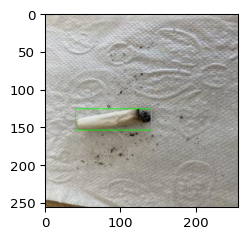

In [4]:

ia.imshow(bb_test.draw_on_image(test))

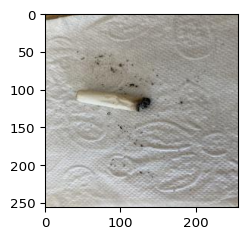

In [11]:
ia.imshow(image_aug_180)